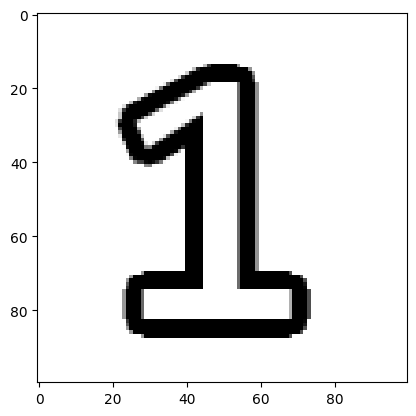

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
image = cv2.imread('ref_1.jpg')
plt.imshow(image)
plt.show()

In [2]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# blur
blur = cv2.GaussianBlur(gray, (0,0), sigmaX=33, sigmaY=33)

# divide
divide = cv2.divide(gray, blur, scale=255)

# otsu threshold
thresh = cv2.threshold(divide, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

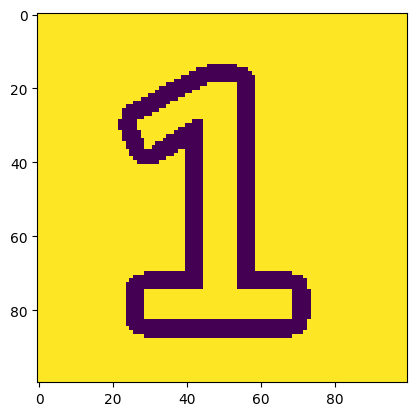

In [3]:
plt.imshow(morph)
plt.show()

In [4]:
(h_1,w_1)=morph.shape[:2]

In [5]:
cr=(w_1//2,h_1//2)

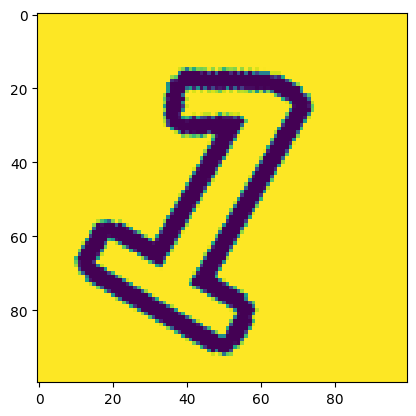

In [11]:
M = cv2.getRotationMatrix2D(cr,-30,1)
after_rotation = cv2.warpAffine(morph,M,(w_1,h_1), borderMode=cv2.BORDER_CONSTANT,
                           borderValue=(255,255,0))
plt.imshow(after_rotation)
plt.show()